In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
def generating_func(x, err=0):
    return np.random.normal(np.sin(x), err)

In [5]:
n_samples = 20
np.random.seed(0)
x_training = 10 ** np.linspace(-2, 0, n_samples)
y_training = generating_func(x_training)

x_test = np.linspace(-0.2, 0, n_samples)
y_test = generating_func(x_test)

# different degrees of complexity
degrees = [1, 2, 3,4,5, 6,7 ,8 ,9 ,10, 12, 13, 14, 15]

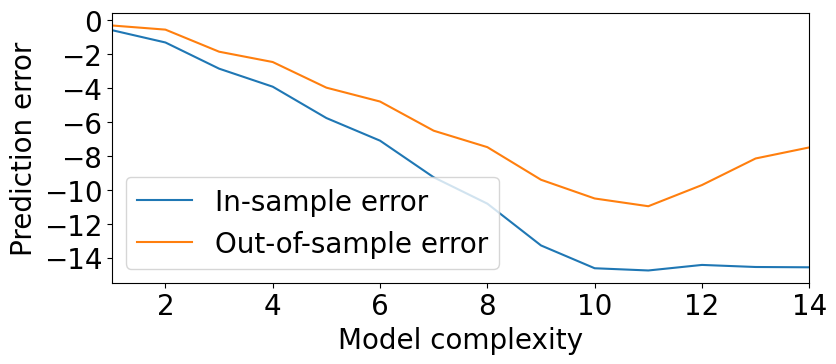

In [7]:
Training_error=np.zeros([1,len(degrees)])
Test_error=np.zeros([1,len(degrees)])
for i, d in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(x_training[:, np.newaxis], y_training)
    Training_error[0,i]= np.sum(np.abs(model.predict(x_training[:, np.newaxis])-y_training))
    Test_error[0,i]= np.sum(np.abs(model.predict(x_test[:, np.newaxis])-y_test))

idx=np.arange(0,len(degrees))+1
fig = plt.figure(figsize=(9, 3.5))
plt.plot(idx, np.transpose(np.log10(Training_error)),label='In-sample error')
plt.plot(idx,np.transpose(np.log10(Test_error)),label='Out-of-sample error')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(1,len(degrees))
plt.xlabel('Model complexity',fontsize=20)
plt.ylabel('Prediction error',fontsize=20)
plt.legend(fontsize=20,loc=3)
plt.show()